# Evaluate

* https://huggingface.co/docs/evaluate/v0.4.0/en/a_quick_tour

In [ ]:
!pip install -r requirements.txt

In [2]:
import transformers
import evaluate
import torch

In [3]:
evaluate.__version__

'0.4.3'

# A quick tour
快速浏览

🤗 Evaluate provides access to a wide range of evaluation tools. It covers a range of modalities such as text, computer vision, audio, etc. as well as tools to evaluate models or datasets. These tools are split into three categories.

🤗 Evaluate 提供对各种评估工具的访问. 它涵盖了一系列模态, 例如文本、计算机视觉、音频等, 以及用于评估模型或数据集的工具. 这些工具分为三类.

### Types of evaluations
评估类型

There are different aspects of a typical machine learning pipeline that can be evaluated and for each aspect 🤗 Evaluate provides a tool:

典型的机器学习管道有不同方面可以进行评估, 对于每个方面🤗, Evaluate 都提供了一个工具:

* Metric: A metric is used to evaluate a model’s performance and usually involves the model’s predictions as well as some ground truth labels. You can find all integrated metrics at evaluate-metric.

  指标: 指标用于评估模型的性能, 通常涉及模型的预测以及一些真实标签. 您可以在 evaluate-metric 中找到所有集成量度.

* Comparison: A comparison is used to compare two models. This can for example be done by comparing their predictions to ground truth labels and computing their agreement. You can find all integrated comparisons at evaluate-comparison.

  比较: 用于比较两个模型. 例如, 这可以通过将它们的预测与真实标签进行比较并计算它们的一致性来完成. 您可以在 evaluate-comparison 中找到所有集成比较.

* Measurement: The dataset is as important as the model trained on it. With measurements one can investigate a dataset’s properties. You can find all integrated measurements at evaluate-measurement.

  测量: 数据集与在其上训练的模型一样重要. 通过测量, 可以研究数据集的属性. 您可以在 evaluate-measurement 找到所有集成测量.

Each of these evaluation modules live on Hugging Face Hub as a Space. They come with an interactive widget and a documentation card documenting its use and limitations. For example accuracy:

这些评估模块中的每一个都位于 Hugging Face Hub 上, 作为一个 Space. 它们附带一个交互式小部件和一个文档卡, 记录了其用法和限制. 例如精度:

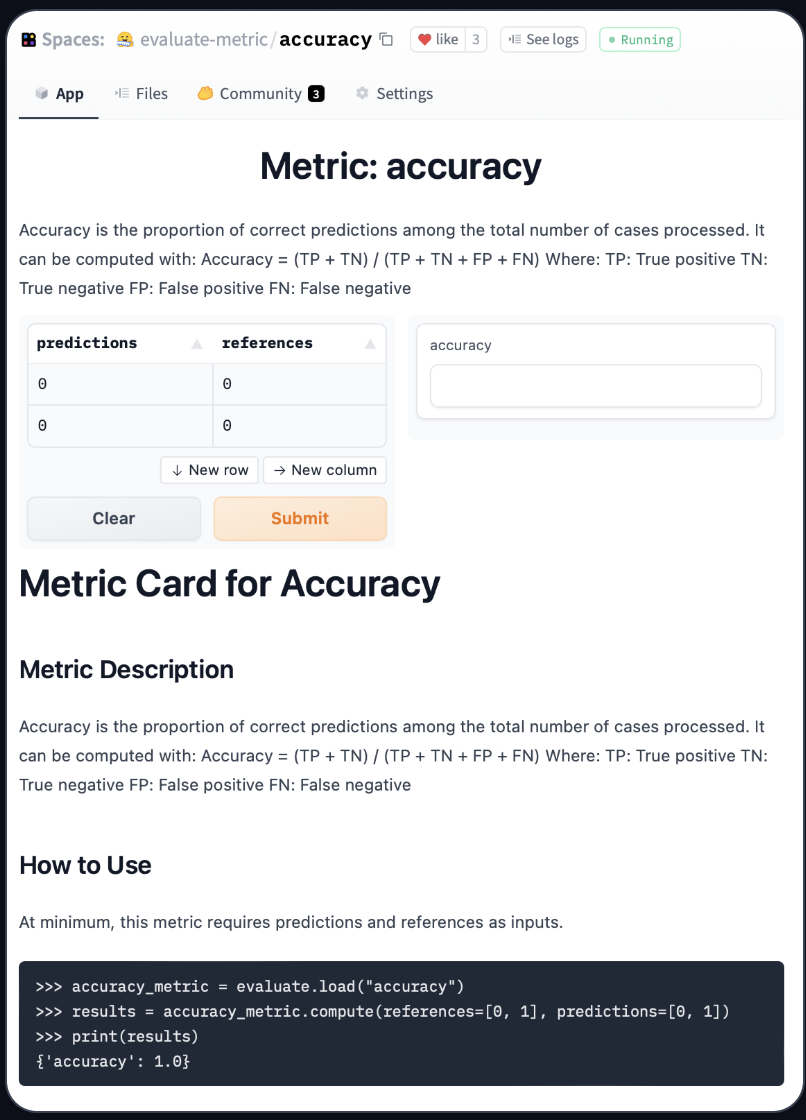

Each metric, comparison, and measurement is a separate Python module, but for using any of them, there is a single entry point: evaluate.load()!

每个指标、比较和测量都是一个单独的 Python 模块, 但要使用其中任何一个, 都有一个入口点: evaluate.load()!

### Load

Any metric, comparison, or measurement is loaded with the evaluate.load function:

任何度量、比较或测量都使用 evaluate.load 函数加载:

In [ ]:
# List all evaluation modules available on the Hugging Face Hub.
import evaluate
# help(evaluate.list_evaluation_modules)
"""
[
    {
        'name': 'codeparrot/apps_metric',
        'type': 'metric',
        'community': True,
        'likes': 7
    },
    {
        'name': 'ncoop57/levenshtein_distance',
        'type': 'comparison',
        'community': True,
        'likes': 0
    },
    {
        'name': 'prb977/cooccurrence_count',
        'type': 'measurement',
        'community': True,
        'likes': 0
    }
]
"""
evaluate.list_evaluation_modules(module_type=None, include_community=True, with_details=True)

In [5]:
import evaluate
accuracy = evaluate.load("accuracy")
print("accuracy:", accuracy)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


accuracy: EvaluationModule(name: "accuracy", module_type: "metric", features: {'predictions': Value(dtype='int32', id=None), 'references': Value(dtype='int32', id=None)}, usage: """
Args:
    predictions (`list` of `int`): Predicted labels.
    references (`list` of `int`): Ground truth labels.
    normalize (`boolean`): If set to False, returns the number of correctly classified samples. Otherwise, returns the fraction of correctly classified samples. Defaults to True.
    sample_weight (`list` of `float`): Sample weights Defaults to None.

Returns:
    accuracy (`float` or `int`): Accuracy score. Minimum possible value is 0. Maximum possible value is 1.0, or the number of examples input, if `normalize` is set to `True`.. A higher score means higher accuracy.

Examples:

    Example 1-A simple example
        >>> accuracy_metric = evaluate.load("accuracy")
        >>> results = accuracy_metric.compute(references=[0, 1, 2, 0, 1, 2], predictions=[0, 1, 1, 2, 1, 0])
        >>> print(res

In [7]:
!apt-get install tree && tree -L 2 ~/.cache/huggingface/

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tree is already the newest version (2.0.2-1).
0 upgraded, 0 newly installed, 0 to remove and 22 not upgraded.
/root/.cache/huggingface/
├── datasets
│   ├── imdb
│   ├── _root_.cache_huggingface_datasets_imdb_plain_text_0.0.0_e6281661ce1c48d982bc483cf8a173c1bbeb5d31.lock
│   ├── _root_.cache_huggingface_datasets_sst2_default_0.0.0_8d51e7e4887a4caaa95b3fbebbf53c0490b58bbb.lock
│   └── sst2
├── evaluate
│   └── downloads
├── hub
│   ├── datasets--imdb
│   ├── datasets--sst2
│   ├── models--huggingface--prunebert-base-uncased-6-finepruned-w-distil-mnli
│   ├── models--lvwerra--distilbert-imdb
│   └── version.txt
├── metrics
│   ├── accuracy
│   ├── element_count
│   ├── f1
│   ├── precision
│   ├── recall
│   └── word_length
└── modules
    ├── evaluate_modules
    └── __init__.py

19 directories, 4 files


In [8]:
!cat ~/.cache/huggingface/modules/evaluate_modules/metrics/evaluate-metric--accuracy/f887c0aab52c2d38e1f8a215681126379eca617f96c447638f751434e8e65b14/accuracy.py

# Copyright 2020 The HuggingFace Datasets Authors and the current dataset script contributor.
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
"""Accuracy metric."""

import datasets
from sklearn.metrics import accuracy_score

import evaluate


_DESCRIPTION = """
Accuracy is the proportion of correct predictions among the total number of cases processed. It can be computed with:
Accuracy = (TP + TN) / (TP + TN + FP + FN)
 Where:
TP: True positive
TN: True negative
FP: False positive
FN: False negat

If you want to make sure you are loading the right type of evaluation (especially if there are name clashes) you can explicitly pass the type:

如果要确保加载的是正确的评估类型(尤其是在存在名称冲突的情况下), 可以显式传递类型:

In [9]:
word_length = evaluate.load("word_length", module_type="measurement")
word_length

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


EvaluationModule(name: "word_length", module_type: "measurement", features: {'data': Value(dtype='string', id=None)}, usage: """
Args:
    `data`: a list of `str` for which the word length is calculated.
    `tokenizer` (`Callable`) : the approach used for tokenizing `data` (optional).
        The default tokenizer is `word_tokenize` from NLTK: https://www.nltk.org/api/nltk.tokenize.html
        This can be replaced by any function that takes a string as input and returns a list of tokens as output.

Returns:
    `average_word_length` (`float`) : the average number of words in the input list of strings.

Examples:
    >>> data = ["hello world"]
    >>> wordlength = evaluate.load("word_length", module_type="measurement")
    >>> results = wordlength.compute(data=data)
    >>> print(results)
    {'average_word_length': 2}
""", stored examples: 0)

#### Community modules
社区模块

Besides the modules implemented in 🤗 Evaluate you can also load any community module by specifying the repository ID of the metric implementation:

除了在 Evaluate 中🤗实现的模块外, 您还可以通过指定度量实现的存储库 ID 来加载任何社区模块:

See the Creating and Sharing Guide for information about uploading custom metrics.

有关上传自定义指标的信息, 请参阅创建和共享指南.

In [10]:
element_count = evaluate.load("lvwerra/element_count", module_type="measurement")
element_count

EvaluationModule(name: "element_count", module_type: "measurement", features: {'data': Value(dtype='int64', id=None)}, usage: """
Calculates number of elements in dataset
Args:
    data: list of elements.
Returns:
    element_count: number of elements in dataset,
Examples:
    >>> measure = evaluate.load("lvwerra/element_count")
    >>> measure.compute(["a", "b", "c")
    {"element_count": 3}
""", stored examples: 0)

#### List available modules

With list_evaluation_modules() you can check what modules are available on the hub. You can also filter for a specific modules and skip community metrics if you want. You can also see additional information such as likes:

In [11]:
list_evaluation_modules = evaluate.list_evaluation_modules(module_type="comparison", include_community=False, with_details=True)
list_evaluation_modules

[]

### Module attributes

All evalution modules come with a range of useful attributes that help to use a module stored in a EvaluationModuleInfo object.

| Attribute	| Description |
| --- | --- |
| description | A short description of the evaluation module. |
| citation | A BibTex string for citation when available. |
| features | A Features object defining the input format. |
| inputs_description | This is equivalent to the modules docstring. |
| homepage | The homepage of the module. |
| license | The license of the module. |
| codebase_urls | Link to the code behind the module. |
| reference_urls | Additional reference URLs. |

Let's have a look at a few examples. First, let's look at the description attribute of the accuracy metric:

In [12]:
accuracy = evaluate.load("accuracy")
# dir(accuracy)
# accuracy.description
accuracy.info

MetricInfo(description='\nAccuracy is the proportion of correct predictions among the total number of cases processed. It can be computed with:\nAccuracy = (TP + TN) / (TP + TN + FP + FN)\n Where:\nTP: True positive\nTN: True negative\nFP: False positive\nFN: False negative\n', citation='\n@article{scikit-learn,\n  title={Scikit-learn: Machine Learning in {P}ython},\n  author={Pedregosa, F. and Varoquaux, G. and Gramfort, A. and Michel, V.\n         and Thirion, B. and Grisel, O. and Blondel, M. and Prettenhofer, P.\n         and Weiss, R. and Dubourg, V. and Vanderplas, J. and Passos, A. and\n         Cournapeau, D. and Brucher, M. and Perrot, M. and Duchesnay, E.},\n  journal={Journal of Machine Learning Research},\n  volume={12},\n  pages={2825--2830},\n  year={2011}\n}\n', features={'predictions': Value(dtype='int32', id=None), 'references': Value(dtype='int32', id=None)}, inputs_description='\nArgs:\n    predictions (`list` of `int`): Predicted labels.\n    references (`list` of `

You can see that it describes how the metric works in theory. If you use this metric for your work, especially if it is an academic publication you want to reference it properly. For that you can look at the citation attribute:

In [13]:
# 引用
accuracy.citation

'\n@article{scikit-learn,\n  title={Scikit-learn: Machine Learning in {P}ython},\n  author={Pedregosa, F. and Varoquaux, G. and Gramfort, A. and Michel, V.\n         and Thirion, B. and Grisel, O. and Blondel, M. and Prettenhofer, P.\n         and Weiss, R. and Dubourg, V. and Vanderplas, J. and Passos, A. and\n         Cournapeau, D. and Brucher, M. and Perrot, M. and Duchesnay, E.},\n  journal={Journal of Machine Learning Research},\n  volume={12},\n  pages={2825--2830},\n  year={2011}\n}\n'

Before we can apply a metric or other evaluation module to a use-case, we need to know what the input format of the metric is:

In [14]:
accuracy.features

{'predictions': Value(dtype='int32', id=None),
 'references': Value(dtype='int32', id=None)}

> Note that features always describe the type of a single input element. In general we will add lists of elements so you can always think of a list around the types in features. Evaluate accepts various input formats (Python lists, NumPy arrays, PyTorch tensors, etc.) and converts them to an appropriate format for storage and computation.
>
> 请注意, 特征始终描述单个 input 元素的类型. 一般来说, 我们会添加元素列表, 这样你就可以随时围绕 features 中的类型考虑一个列表. Evaluate 接受各种输入格式(Python 列表、NumPy 数组、PyTorch 张量等), 并将它们转换为适当的格式以进行存储和计算.
>

### Compute

Now that we know how the evaluation module works and what should go in there we want to actually use it! When it comes to computing the actual score there are two main ways to do it:

现在我们知道了评估模块是如何工作的以及应该包含什么, 我们想实际使用它! 在计算实际分数时, 有两种主要方法可以做到这一点:

1. All-in-one

   多合一

2. Incremental

   增量

In the incremental approach the necessary inputs are added to the module with EvaluationModule.add() or EvaluationModule.add_batch() and the score is calculated at the end with EvaluationModule.compute(). Alternatively, one can pass all the inputs at once to compute(). Let’s have a look at the two approaches.

在增量方法中, 使用 EvaluationModule.add() 或 EvaluationModule.add_batch() 将必要的输入添加到模块中, 最后使用 EvaluationModule.compute() 计算分数. 或者, 可以一次将所有输入传递给 compute(). 让我们来看看这两种方法.

#### How to compute

The simplest way to calculate the score of an evaluation module is by calling compute() directly with the necessary inputs. Simply pass the inputs as seen in features to the compute() method.

计算评估模块分数的最简单方法是使用必要的 inputs 直接调用 compute().

In [15]:
accuracy.compute(references=[0, 1, 0, 1], predictions=[1, 0, 0, 1])

{'accuracy': 0.5}

Evaluation modules return the results in a dictionary. However, in some instances you build up the predictions iteratively or in a distributed fashion in which case add() or add_batch() are useful.

评估模块将结果返回字典中. 但是, 在某些情况下, 您可以迭代或以分布式方式构建预测, 在这种情况下, add() 或 add_batch() 很有用.

#### Calculate a single metric or a batch of metrics
计算单个指标或一批指标

In many evaluation pipelines you build the predictions iteratively such as in a for-loop. In that case you could store the predictions in a list and at the end pass them to compute(). With add() and add_batch() you can circumvent the step of storing the predictions separately. If you are only creating single predictions at a time you can use add():

在许多评估管道中, 您以迭代方式构建预测, 例如在 for 循环中. 在这种情况下, 您可以将预测存储在一个列表中, 并在最后将它们传递给 compute(). 使用 add() 和 add_batch() 可以避免单独存储预测的步骤. 如果您一次只创建单个预测, 则可以使用 add():

In [16]:
for ref, pred in zip([1, 2, 3, 4], [5, 6, 7, 8]):
    print("ref:", ref)
    print("pred:", pred)
    accuracy.add(references=ref, predictions=pred)
accuracy.compute()

ref: 1
pred: 5
ref: 2
pred: 6
ref: 3
pred: 7
ref: 4
pred: 8


{'accuracy': 0.0}

Once you have gathered all predictions you can call compute() to compute the score based on all stored values. When getting predictions and references in batches you can use add_batch() which adds a list elements for later processing. The rest works as with add():

收集完所有预测后, 您可以调用 compute() 来根据所有存储的值计算分数. 在批量获取预测和引用时, 你可以使用 add_batch() 它添加一个列表元素以供以后处理. 其余部分的工作方式与 add() 相同:

In [17]:
for refs, preds in zip([[1, 2],[3, 4]], [[5, 6],[7, 8]]):
    print("refs:", refs)
    print("preds:", preds)
    accuracy.add_batch(references=refs, predictions=preds)
accuracy.compute()

refs: [1, 2]
preds: [5, 6]
refs: [3, 4]
preds: [7, 8]


{'accuracy': 0.0}

This is especially useful when you need to get the predictions from your model in batches:

```python
for model_inputs, gold_standards in evaluation_dataset:
    predictions = model(model_inputs)
    metric.add_batch(references=gold_standards, predictions=predictions)
metric.compute()
```

#### Distributed evaluation
分布式评估

Computing metrics in a distributed environment can be tricky. Metric evaluation is executed in separate Python processes, or nodes, on different subsets of a dataset. Typically, when a metric score is additive (f(AuB) = f(A) + f(B)), you can use distributed reduce operations to gather the scores for each subset of the dataset. But when a metric is non-additive (f(AuB) ≠ f(A) + f(B)), it’s not that simple. For example, you can’t take the sum of the F1 scores of each data subset as your final metric.

在分布式环境中计算指标可能很棘手. 指标评估在数据集的不同子集上的单独 Python 进程或节点中执行. 通常, 当指标分数为累加性 (f(AuB) = f(A) + f(B)) 时, 您可以使用分布式 reduce 作来收集数据集的每个子集的分数. 但是当一个度量是非加法的 (f(AuB) ≠ f(A) + f(B)) 时, 就不是那么简单了. 例如, 您不能将每个数据子集的 F1 分数之和作为最终指标.

A common way to overcome this issue is to fallback on single process evaluation. The metrics are evaluated on a single GPU, which becomes inefficient.

解决此问题的一种常见方法是回退到单个进程评估. 这些指标在单个 GPU 上进行评估, 效率低下.

🤗 Evaluate solves this issue by only computing the final metric on the first node. The predictions and references are computed and provided to the metric separately for each node. These are temporarily stored in an Apache Arrow table, avoiding cluttering the GPU or CPU memory. When you are ready to compute() the final metric, the first node is able to access the predictions and references stored on all the other nodes. Once it has gathered all the predictions and references, compute() will perform the final metric evaluation.

🤗 Evaluate 通过仅计算第一个节点上的最终指标来解决此问题. 将为每个节点分别计算预测和引用并提供给指标. 这些内存临时存储在 Apache Arrow 表中, 避免了 GPU 或 CPU 内存的混乱. 当您准备好 compute() 最终指标时, 第一个节点能够访问存储在所有其他节点上的预测和引用. 收集完所有预测和引用后, compute() 将执行最终的指标评估.

This solution allows 🤗 Evaluate to perform distributed predictions, which is important for evaluation speed in distributed settings. At the same time, you can also use complex non-additive metrics without wasting valuable GPU or CPU memory.

此解决方案允许 🤗 Evaluate 执行分布式预测, 这对于分布式设置中的评估速度非常重要. 同时, 您还可以使用复杂的非累加指标, 而不会浪费宝贵的 GPU 或 CPU 内存.

### Combining several evaluations
组合多个评估

Often one wants to not only evaluate a single metric but a range of different metrics capturing different aspects of a model. E.g. for classification it is usually a good idea to compute F1-score, recall, and precision in addition to accuracy to get a better picture of model performance. Naturally, you can load a bunch of metrics and call them sequentially. However, a more convenient way is to use the combine() function to bundle them together:

通常, 人们不仅希望评估单个指标, 还希望评估捕获模型不同方面的一系列不同指标. 例如, 对于分类, 除了准确性之外, 通常最好计算 F1 分数、召回率和精度, 以更好地了解模型性能. 当然, 您可以加载一组指标并按顺序调用它们. 但是, 更方便的方法是使用 combine() 函数将它们捆绑在一起:

In [18]:
clf_metrics = evaluate.combine(["accuracy", "f1", "precision", "recall"])

In [19]:
!tree -L 2 ~/.cache/huggingface/

/root/.cache/huggingface/
├── datasets
│   ├── imdb
│   ├── _root_.cache_huggingface_datasets_imdb_plain_text_0.0.0_e6281661ce1c48d982bc483cf8a173c1bbeb5d31.lock
│   ├── _root_.cache_huggingface_datasets_sst2_default_0.0.0_8d51e7e4887a4caaa95b3fbebbf53c0490b58bbb.lock
│   └── sst2
├── evaluate
│   └── downloads
├── hub
│   ├── datasets--imdb
│   ├── datasets--sst2
│   ├── models--huggingface--prunebert-base-uncased-6-finepruned-w-distil-mnli
│   ├── models--lvwerra--distilbert-imdb
│   └── version.txt
├── metrics
│   ├── accuracy
│   ├── element_count
│   ├── f1
│   ├── precision
│   ├── recall
│   └── word_length
└── modules
    ├── evaluate_modules
    └── __init__.py

19 directories, 4 files


The combine function accepts both the list of names of the metrics as well as an instantiated modules. The compute call then computes each metric:

combine 函数接受 metrics 的名称列表以及实例化的模块. 然后, 计算调用计算每个指标:

In [20]:
clf_metrics.compute(predictions=[0, 1, 0], references=[0, 1, 1])

{'accuracy': 0.6666666666666666,
 'f1': 0.6666666666666666,
 'precision': 1.0,
 'recall': 0.5}

### Save and push to the Hub
保存并推送到 Hub

Saving and sharing evaluation results is an important step. We provide the evaluate.save() function to easily save metrics results. You can either pass a specific filename or a directory. In the latter case, the results are saved in a file with an automatically created file name. Besides the directory or file name, the function takes any key-value pairs as inputs and stores them in a JSON file.

保存和共享评估结果是一个重要步骤. 我们提供 evaluate.save() 函数来轻松保存指标结果. 您可以传递特定文件名或目录. 在后一种情况下, 结果将保存在具有自动创建的文件名的文件中. 除了目录或文件名之外, 该函数还采用任何键值对作为输入, 并将它们存储在 JSON 文件中.

```python
result = accuracy.compute(references=[0,1,0,1], predictions=[1,0,0,1])

hyperparams = {"model": "bert-base-uncased"}
evaluate.save("./results/"experiment="run 42", **result, **hyperparams)
```

The content of the JSON file look like the following:

```json
{
    "experiment": "run 42",
    "accuracy": 0.5,
    "model": "bert-base-uncased",
    "_timestamp": "2022-05-30T22:09:11.959469",
    "_git_commit_hash": "123456789abcdefghijkl",
    "_evaluate_version": "0.1.0",
    "_python_version": "3.9.12 (main, Mar 26 2022, 15:51:15) \n[Clang 13.1.6 (clang-1316.0.21.2)]",
    "_interpreter_path": "/Users/leandro/git/evaluate/env/bin/python"
}
```

In addition to the specified fields, it also contains useful system information for reproducing the results.

除了指定的字段外, 它还包含用于重现结果的有用系统信息.

Besides storing the results locally, you should report them on the model's repository on the Hub. With the evaluate.push_to_hub() function, you can easily report evaluation results to the model's repository:

除了在本地存储结果外, 您还应该在 Hub 上的模型存储库中报告它们. 使用 evaluate.push_to_hub() 函数, 您可以轻松地将评估结果报告到模型的存储库:

```python
evaluate.push_to_hub(
  model_id="huggingface/gpt2-wikitext2",  # model repository on hub
  metric_value=0.5,                       # metric value
  metric_type="bleu",                     # metric name, e.g. accuracy.name
  metric_name="BLEU",                     # pretty name which is displayed
  dataset_type="wikitext",                # dataset name on the hub
  dataset_name="WikiText",                # pretty name
  dataset_split="test",                   # dataset split used
  task_type="text-generation",            # task id, see https://github.com/huggingface/datasets/blob/master/src/datasets/utils/resources/tasks.json
  task_name="Text Generation"             # pretty name for task
)
```

### Evaluator

The evaluate.evaluator() provides automated evaluation and only requires a model, dataset, metric in contrast to the metrics in EvaluationModules that require the model's predictions. As such it is easier to evaluate a model on a dataset with a given metric as the inference is handled internally. To make that possible it uses the pipeline abstraction from transformers. However, you can use your own framework as long as it follows the pipeline interface.

evaluate.evaluator() 提供自动评估, 并且只需要模型、数据集、指标, 而 EvaluationModule中的指标需要模型的预测. 因此, 由于推理是在内部处理的, 因此更容易在具有给定指标的数据集上评估模型. 为了实现这一点, 它使用了 transformer 的 pipeline abstraction. 但是, 您可以使用自己的框架, 只要它遵循管道接口即可.

To make an evaluation with the evaluator let's load a transformers pipeline (but you can pass your own custom inference class for any framework as long as it follows the pipeline call API) with an model trained on IMDb, the IMDb test split and the accuracy metric.

要使用评估器进行评估, 让我们加载一个转换器管道(但您可以为任何框架传递自己的自定义推理类, 只要它遵循管道调用 API), 其中包含在 IMDb 上训练的模型、IMDb 测试拆分和准确性指标.

In [21]:
from transformers import pipeline
from datasets import load_dataset
from evaluate import evaluator
import evaluate

# help(pipeline)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("device:", device)

pipe = pipeline("text-classification", model="lvwerra/distilbert-imdb", device=device)
data = load_dataset("imdb", split="test").shuffle().select(range(1000))
metric = evaluate.load("accuracy")

device: cuda


Device set to use cuda


Then you can create an evaluator for text classification and pass the three objects to the compute() method. With the label mapping evaluate provides a method to align the pipeline outputs with the label column in the dataset:

然后, 您可以创建用于文本分类的计算器, 并将这三个对象传递给 calc() 方法. 使用标签映射, evaluate 提供了一种将管道输出与数据集中的标签列对齐的方法:

In [22]:
task_evaluator = evaluator("text-classification")

results = task_evaluator.compute(model_or_pipeline=pipe, data=data, metric=metric,
                       label_mapping={"NEGATIVE": 0, "POSITIVE": 1},)

print(results)

{'accuracy': 0.922, 'total_time_in_seconds': 9.549966197000003, 'samples_per_second': 104.71241252289845, 'latency_in_seconds': 0.009549966197000003}


Calculating the value of the metric alone is often not enough to know if a model performs significantly better than another one. With bootstrapping evaluate computes confidence intervals and the standard error which helps estimate how stable a score is:

仅计算指标的值通常不足以了解一个模型的性能是否明显优于另一个模型. 使用 bootstrappingevaluate 计算置信区间和标准误差, 这有助于估计分数的稳定性:

In [23]:
results = task_evaluator.compute(model_or_pipeline=pipe, data=data, metric=metric,
                       label_mapping={"NEGATIVE": 0, "POSITIVE": 1},
                       strategy="bootstrap", n_resamples=200)

print(results)

{'accuracy': {'confidence_interval': (0.903, 0.935), 'standard_error': 0.008661053297440534, 'score': 0.922}, 'total_time_in_seconds': 9.42442193099987, 'samples_per_second': 106.1073036968652, 'latency_in_seconds': 0.00942442193099987}


The evaluator expects a "text" and "label" column for the data input. If your dataset differs you can provide the columns with the keywords input_column="text" and label_column="label". Currently only "text-classification" is supported with more tasks being added in the future.

评估器需要数据输入的 "text" 和 "label" 列. 如果您的数据集不同, 您可以为列提供关键字 input_column="text" 和 label_column="label". 目前仅支持 "text-classification", 将来会添加更多任务.

### Visualization

When comparing several models, sometimes it's hard to spot the differences in their performance simply by looking at their scores. Also often there is not a single best model but there are trade-offs between e.g. latency and accuracy as larger models might have better performance but are also slower. We are gradually adding different visualization approaches, such as plots, to make choosing the best model for a use-case easier.

在比较多个模型时, 有时仅通过查看它们的分数很难发现它们的性能差异. 此外, 通常没有一个最佳模型, 但在延迟和准确性等之间需要权衡, 因为较大的模型可能具有更好的性能, 但也更慢. 我们正在逐步添加不同的可视化方法, 例如绘图, 以便更轻松地为用例选择最佳模型.

For instance, if you have a list of results from multiple models (as dictionaries), you can feed them into the radar_plot() function:

例如, 如果你有一个来自多个模型的结果列表(作为字典), 你可以将它们输入到 radar_plot() 函数中:


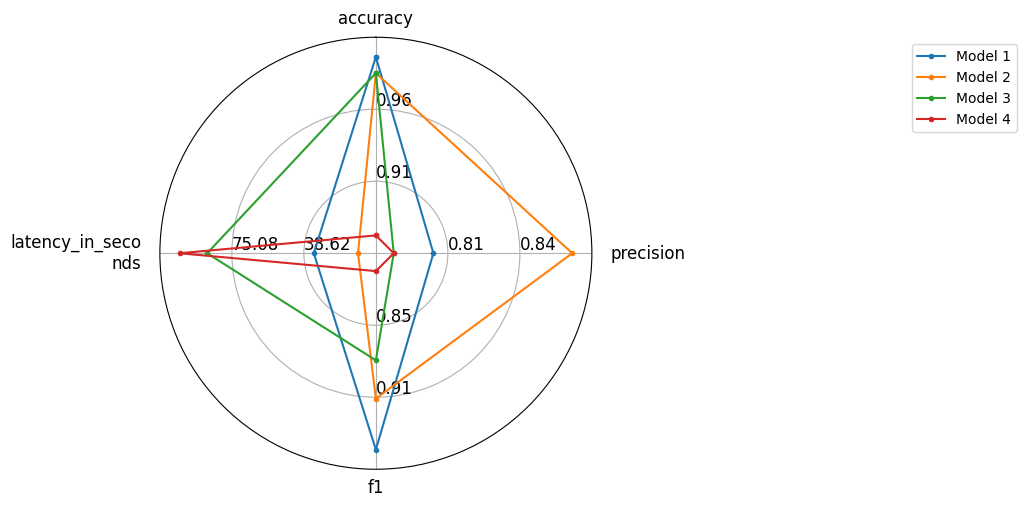

In [24]:
import evaluate
from evaluate.visualization import radar_plot

data = [
   {"accuracy": 0.99, "precision": 0.8, "f1": 0.95, "latency_in_seconds": 33.6},
   {"accuracy": 0.98, "precision": 0.87, "f1": 0.91, "latency_in_seconds": 11.2},
   {"accuracy": 0.98, "precision": 0.78, "f1": 0.88, "latency_in_seconds": 87.6},
   {"accuracy": 0.88, "precision": 0.78, "f1": 0.81, "latency_in_seconds": 101.6}
   ]
model_names = ["Model 1", "Model 2", "Model 3", "Model 4"]
plot = radar_plot(data=data, model_names=model_names)
plot.show()

Which lets you visually compare the 4 models and choose the optimal one for you, based on one or several metrics:

这样, 您就可以直观地比较这 4 个模型, 并根据一个或多个指标选择最适合您的模型:

### Running evaluation on a suite of tasks
对一组任务运行评估

It can be useful to evaluate models on a variety of different tasks to understand their downstream performance. The EvaluationSuite enables evaluation of models on a collection of tasks. Tasks can be constructed as (evaluator, dataset, metric) tuples and passed to an EvaluationSuite stored on the Hugging Face Hub as a Space, or locally as a Python script. See the evaluator documentation for a list of currently supported tasks.

在各种不同任务上评估模型以了解其下游性能可能很有用. EvaluationSuite 支持对一组任务的模型进行评估. 任务可以构造为 (evaluator, dataset, metric) 元组, 并作为 Space 或本地作为 Python 脚本传递给存储在 Hugging Face Hub 上的 EvaluationSuite. 有关当前支持的任务列表, 请参阅 evaluator 文档.

EvaluationSuite scripts can be defined as follows, and supports Python code for data preprocessing.

EvaluationSuite 脚本可以定义如下, 并支持使用 Python 代码进行数据预处理.

In [25]:
import evaluate
from evaluate.evaluation_suite import SubTask

class Suite(evaluate.EvaluationSuite):

    def __init__(self, name):
        super().__init__(name)

        self.suite = [
            SubTask(
                task_type="text-classification",
                data="imdb",
                split="test[:1]",
                args_for_task={
                    "metric": "accuracy",
                    "input_column": "text",
                    "label_column": "label",
                    "label_mapping": {
                        "LABEL_0": 0.0,
                        "LABEL_1": 1.0
                    }
                }
            ),
            SubTask(
                task_type="text-classification",
                data="sst2",
                split="test[:1]",
                args_for_task={
                    "metric": "accuracy",
                    "input_column": "sentence",
                    "label_column": "label",
                    "label_mapping": {
                        "LABEL_0": 0.0,
                        "LABEL_1": 1.0
                    }
                }
            )
        ]

Evaluation can be run by loading the EvaluationSuite and calling run() method with a model or pipeline.

可以通过加载 EvaluationSuite 并使用模型或管道调用 run() 方法来运行评估.

In [26]:
from evaluate import EvaluationSuite
suite = EvaluationSuite.load('mathemakitten/sentiment-evaluation-suite')
results = suite.run("huggingface/prunebert-base-uncased-6-finepruned-w-distil-mnli")
results

Device set to use cuda:0
Device set to use cuda:0


[{'accuracy': 0.3,
  'total_time_in_seconds': 0.25111528999991606,
  'samples_per_second': 39.8223461422972,
  'latency_in_seconds': 0.025111528999991608,
  'task_name': 'imdb',
  'data_preprocessor': '<function Suite.__init__.<locals>.<lambda> at 0x7930e7022c00>'},
 {'accuracy': 0.0,
  'total_time_in_seconds': 0.09691148599995358,
  'samples_per_second': 103.18694318653611,
  'latency_in_seconds': 0.009691148599995357,
  'task_name': 'sst2',
  'data_preprocessor': '<function Suite.__init__.<locals>.<lambda> at 0x7930e163c0e0>'}]